In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [3]:
file = 'Data/Sigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

In [111]:
Data = pd.read_csv(Path_,sep=',')
x = np.array(Data['x'])
y = np.array(Data['y'])

In [5]:
def Model(x,theta):
    M = theta[0]/(theta[1]+np.exp(-theta[2]*x))
    return M

In [6]:
def Cost(x,y,M,theta):
    cost = np.sum((y-M(x,theta))**2)
    return cost

C)

$\frac{\partial \chi^2}{\partial \theta_i} = \frac{\partial \chi^2}{\partial M} \frac{\partial M(x_i,\theta)}{\partial \theta_i}$
$= \sum_{i=1}^n \Bigl(2(y_i-M(x_i,\theta))*\Bigl(-\frac{\partial M(x_i,\theta)}{\partial \theta_i}\Bigr)\Bigr) $

$= -2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta))\Bigl(\frac{\partial M(x_i,\theta)}{\partial \theta_i}\Bigr)\Bigr)$

D)

$ \vec{\theta}_{j+1} = \vec{\theta}_j - \gamma \nabla_\theta M(\theta) = \vec{\theta}_j - \gamma \begin{bmatrix} \frac{\partial M}{\partial \theta_0} \\ \frac{\partial M}{\partial \theta_1} \\ \frac{\partial M}{\partial \theta_2} \end{bmatrix} = \vec{\theta}_j - \gamma \begin{bmatrix} -2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta))\Bigl(\frac{\partial M(x_i,\theta)}{\partial \theta_0}\Bigr)\Bigr) \\ -2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta))\Bigl(\frac{\partial M(x_i,\theta)}{\partial \theta_2}\Bigr)\Bigr) \\ -2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta))\Bigl(\frac{\partial M(x_i,\theta)}{\partial \theta_3}\Bigr)\Bigr) \end{bmatrix} = \vec{\theta}_j - \gamma \Bigl(-2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta)) \Bigr) \begin{bmatrix} \frac{\partial M}{\partial \theta_0} \\ \frac{\partial M}{\partial \theta_1} \\ \frac{\partial M}{\partial \theta_2} \end{bmatrix}  = \vec{\theta}_j - \gamma \Bigl(-2 \sum_{i=1}^n \Bigl((y_i-M(x_i,\theta)) \Bigr)\nabla_{\theta}M(x_i,\theta_j) $



In [132]:
def NewTheta(x,y,gamma,M,theta,h=1e-6):
    new_theta = np.zeros(3)
    grad1 = (  M(x,theta+h*np.array([1,0,0])) - M(x,theta-h*np.array([1,0,0])) )/(2*h)
    grad2 = (  M(x,theta+h*np.array([0,1,0])) - M(x,theta-h*np.array([0,1,0])) )/(2*h)
    grad3 = (  M(x,theta+h*np.array([0,0,1])) - M(x,theta-h*np.array([0,0,1])) )/(2*h)
    new_theta[0]=theta[0] -gamma*((-2)*np.sum((y- M(x,theta))*grad1))
    new_theta[1]= theta[1]-gamma*((-2)*np.sum((y- M(x,theta))*grad2))
    new_theta[2] =theta[2] -gamma*((-2)*np.sum((y- M(x,theta))*grad3))
    return new_theta

In [170]:
def Descent(x,y,M,theta0,gamma,max_error = 0.01,epochs = 2e4):
    error = 1
    theta = theta0
    it = 0
    while error > max_error and it < epochs:
        cost = Cost(x,y,M,theta)
        theta = NewTheta(x,y,gamma,M,theta)
        newCost = Cost(x,y,M,theta)
        error = newCost
        it += 1
    if error < max_error:
        print(' Entrenamiento completo ', error, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return theta, error, it

In [171]:
gamma_use = 5e-4
theta0 = np.array([1,1,1])
param,metric,it = Descent(x,y,Model,theta0,gamma_use)

 Entrenamiento no completado 


In [177]:
print('Parametros:',param)

Parametros: [4.3482335  0.96336508 2.79569992]


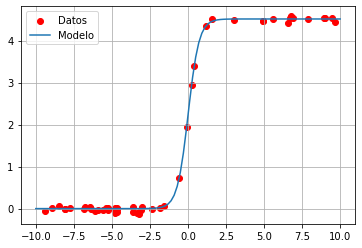

In [176]:
X = np.linspace(-10,10,100)
Y = Model(X,param)
plt.scatter(x,y,c='r',label='Datos')
plt.plot(X,Y,label = 'Modelo')
plt.legend()
plt.grid()